In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from glob import glob

In [ ]:
# 📌 Step 2: Define Dataset Path
DATASET_PATH = "/content/drive/MyDrive/Plant_Dataset"

In [ ]:
# 📌 Step 3: Load Image Filenames & Labels
class_names = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
image_filenames = []
labels = []

In [ ]:
for i, class_name in enumerate(class_names):
    image_folder = os.path.join(DATASET_PATH, class_name)
    image_paths = glob(os.path.join(image_folder, '*.jpg'))  # Load all images
    image_filenames.extend(image_paths)
    labels.extend([i] * len(image_paths))

In [ ]:
image_filenames = np.array(image_filenames)
labels = np.array(labels)
num_classes = len(class_names)

In [ ]:
import os
from glob import glob

DATASET_PATH = "/content/drive/MyDrive/Plant_Dataset"

# Checking image counts in each folder
for class_name in ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']:
    class_folder = os.path.join(DATASET_PATH, class_name)
    images = glob(os.path.join(class_folder, '*.jpg'))  # Ensure correct file extension
    print(f"🔍 {class_name}: {len(images)} images found.")


🔍 Potato___Early_blight: 0 images found.
🔍 Potato___healthy: 0 images found.
🔍 Potato___Late_blight: 0 images found.


In [ ]:
image_filenames = []
labels = []

image_extensions = ['jpg', 'jpeg', 'png']  # Include all possible image formats

for i, class_name in enumerate(class_names):
    image_folder = os.path.join(DATASET_PATH, class_name)
    class_images = []

    for ext in image_extensions:
        class_images.extend(glob(os.path.join(image_folder, f'*.{ext}')))

    if len(class_images) == 0:
        print(f"⚠ Warning: No images found in {class_name}!")

    image_filenames.extend(class_images)
    labels.extend([i] * len(class_images))

# Convert to numpy array
image_filenames = np.array(image_filenames)
labels = np.array(labels)

# Final check
print(f"✅ Total images loaded: {len(image_filenames)}")


⚠ Warning: No images found in Potato___Early_blight!
⚠ Warning: No images found in Potato___healthy!
⚠ Warning: No images found in Potato___Late_blight!
✅ Total images loaded: 0


In [ ]:
t_Dataset!ls -R /content/drive/MyDrive/Plan


/content/drive/MyDrive/Plant_Dataset:
Potato___Early_blight  Potato___healthy  Potato___Late_blight

/content/drive/MyDrive/Plant_Dataset/Potato___Early_blight:
'001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
'002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'
'009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'
'00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'
'0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG'
'02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG'
'0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG'
'028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG'
'034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG'
'03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG'
'042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG'
'044c3abc-0bc9-45fb-8fd5-094aeb605f90___RS_Early.B 8044.JPG'
'048d18ae-98b1-484d-97da-5a0e69b9ebc1___RS_Early.B 6845.JPG'
'04c8e6b9-7710-4cdd-b259-2d78b15d1036___RS_Ear

In [ ]:
import os

DATASET_PATH = "/content/drive/MyDrive/Plant_Dataset"

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):  # Ensure it's a folder
        print(f"📁 Checking: {class_name}")
        print(os.listdir(class_path)[:10])  # Print first 10 files


📁 Checking: Potato___Early_blight
['065fc68f-88c9-4fc3-b0a6-a6f5e1072eaa___RS_Early.B 7174.JPG', '04fd2a46-ddd4-4b0b-8f19-5ecca482a7d5___RS_Early.B 7273.JPG', '06ac6596-8d65-46dd-a343-a2209f3480e4___RS_Early.B 6921.JPG', '028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG', '002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG', '00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG', '08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG', '03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG', '08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG']
📁 Checking: Potato___healthy
['5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG', 'de9a8669-d437-40f0-aa56-fe2d8276a1e0___RS_HL 1910.JPG', '875d6ded-5f01-495c-a945-ad2e17f87f91___RS_HL 1848.JPG', '03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG', '111cd9d8-4d27-4225-be9e-d29b21cf56b9___RS_HL 5419.JPG', '2dee1571-ef6b-40ef-8c46-334e8

In [ ]:
from glob import glob
import numpy as np

image_filenames = []
labels = []
class_names = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

# Include uppercase extensions too
image_extensions = ['jpg', 'jpeg', 'png', 'JPG', 'JPEG', 'PNG']

for i, class_name in enumerate(class_names):
    image_folder = os.path.join(DATASET_PATH, class_name)
    class_images = []

    for ext in image_extensions:
        class_images.extend(glob(os.path.join(image_folder, f'*.{ext}')))

    if len(class_images) == 0:
        print(f"⚠ Warning: No images found in {class_name}!")

    image_filenames.extend(class_images)
    labels.extend([i] * len(class_images))

image_filenames = np.array(image_filenames)
labels = np.array(labels)

print(f"✅ Total images loaded: {len(image_filenames)}")


✅ Total images loaded: 2152


In [ ]:
!ls "/content/drive/MyDrive/Plant_Dataset/Potato___Early_blight"

'001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
'002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'
'009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'
'00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'
'0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG'
'02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG'
'0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG'
'028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG'
'034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG'
'03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG'
'042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG'
'044c3abc-0bc9-45fb-8fd5-094aeb605f90___RS_Early.B 8044.JPG'
'048d18ae-98b1-484d-97da-5a0e69b9ebc1___RS_Early.B 6845.JPG'
'04c8e6b9-7710-4cdd-b259-2d78b15d1036___RS_Early.B 7066.JPG'
'04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG'
'04fd2a46-ddd4-4b0b-8f19-5ecca482a7d5___RS_Early.B 7273.JPG'
'05c35093-11b8-4cd0-b67a

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# 📌 Step 3: Load Image Filenames & Labels
class_names = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
image_filenames = []
labels = []

for i, class_name in enumerate(class_names):
    image_folder = os.path.join(DATASET_PATH, class_name)
    image_paths = glob(os.path.join(image_folder, '*.jpg'))  # Load all images
    image_filenames.extend(image_paths)
    labels.extend([i] * len(image_paths))

image_filenames = np.array(image_filenames)
labels = np.array(labels)
num_classes = len(class_names)


In [ ]:
print("🔍 First 5 image file paths:")
print(image_filenames[:5])


🔍 First 5 image file paths:
[]


In [ ]:
import os

DATASET_PATH = "/content/drive/MyDrive/Plant_Dataset"

if not os.path.exists(DATASET_PATH):
    print("❌ ERROR: Dataset path does not exist. Check Google Drive mount!")
else:
    print("✅ Dataset path exists.")


✅ Dataset path exists.


In [ ]:
print(os.listdir(DATASET_PATH))


['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


In [ ]:
for class_name in ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']:
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        print(f"🖼 {class_name}: Found {len(images)} images.")
    else:
        print(f"❌ ERROR: {class_name} folder not found!")


🖼 Potato___Early_blight: Found 1001 images.
🖼 Potato___healthy: Found 152 images.
🖼 Potato___Late_blight: Found 1001 images.


In [ ]:
  from glob import glob
  import numpy as np

  image_filenames = []
  labels = []
  class_names = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
  image_extensions = ['jpg', 'jpeg', 'png', 'JPG', 'JPEG', 'PNG']

  for i, class_name in enumerate(class_names):
      image_folder = os.path.join(DATASET_PATH, class_name)

      print(f"🔍 Checking {image_folder}...")  # Debugging

      class_images = []
      for ext in image_extensions:
          images = glob(os.path.join(image_folder, f'*.{ext}'))
          print(f"   ➡ Found {len(images)} {ext} files")  # Debugging
          class_images.extend(images)

      if len(class_images) == 0:
          print(f"⚠ Warning: No images found in {class_name}!")

      image_filenames.extend(class_images)
      labels.extend([i] * len(class_images))

  image_filenames = np.array(image_filenames)
  labels = np.array(labels)

  print(f"✅ Total images loaded: {len(image_filenames)}")


🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___Early_blight...
   ➡ Found 0 jpg files
   ➡ Found 0 jpeg files
   ➡ Found 0 png files
   ➡ Found 1000 JPG files
   ➡ Found 0 JPEG files
   ➡ Found 0 PNG files
🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___healthy...
   ➡ Found 0 jpg files
   ➡ Found 0 jpeg files
   ➡ Found 0 png files
   ➡ Found 152 JPG files
   ➡ Found 0 JPEG files
   ➡ Found 0 PNG files
🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___Late_blight...
   ➡ Found 0 jpg files
   ➡ Found 0 jpeg files
   ➡ Found 0 png files
   ➡ Found 1000 JPG files
   ➡ Found 0 JPEG files
   ➡ Found 0 PNG files
✅ Total images loaded: 2152


In [ ]:
image_filenames = []  # Ensure it's a list, not a NumPy array
labels = []

image_extensions = ['JPG']  # Only check for JPG files

for i, class_name in enumerate(class_names):
    image_folder = os.path.join(DATASET_PATH, class_name)
    print(f"🔍 Checking {image_folder}...")

    class_images = []
    for ext in image_extensions:
        images = glob(os.path.join(image_folder, f'*.{ext}'))
        class_images.extend(images)

    if len(class_images) == 0:
        print(f"⚠ Warning: No images found in {class_name}!")

    # Append images properly
    image_filenames.extend(class_images)  # Keep as a list
    labels.extend([i] * len(class_images))

# Convert to NumPy array AFTER all extensions
image_filenames = np.array(image_filenames)
labels = np.array(labels)

print(f"✅ Total images loaded: {len(image_filenames)}")


🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___Early_blight...
🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___healthy...
🔍 Checking /content/drive/MyDrive/Plant_Dataset/Potato___Late_blight...
✅ Total images loaded: 2152


In [ ]:
# 📌 Step 4: K-Fold Cross-Validation Setup
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
avg_accuracy = []
fold_histories = []  # To store accuracy/loss for each fold

for fold, (train_idx, val_idx) in enumerate(kf.split(image_filenames)):
    print(f"🔄 Training on Fold {fold + 1}/{FOLDS}...")

    # 📌 Step 5: Data Augmentation & Image Generators
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_df = pd.DataFrame({'filename': image_filenames[train_idx], 'class': [class_names[i] for i in labels[train_idx]]})
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='class',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)
    val_df = pd.DataFrame({'filename': image_filenames[val_idx], 'class': [class_names[i] for i in labels[val_idx]]})
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='class',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

🔄 Training on Fold 1/5...
Found 1721 validated image filenames belonging to 3 classes.
Found 431 validated image filenames belonging to 3 classes.
🔄 Training on Fold 2/5...
Found 1721 validated image filenames belonging to 3 classes.
Found 431 validated image filenames belonging to 3 classes.
🔄 Training on Fold 3/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.
🔄 Training on Fold 4/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.
🔄 Training on Fold 5/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.


In [ ]:
# 📌 Step 5: Data Augmentation & Image Generators

train_datagen = ImageDataGenerator(rescale=1./255)

# Train Data Generator
train_df = pd.DataFrame({'filename': image_filenames[train_idx], 'class': [class_names[i] for i in labels[train_idx]]})
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Validation Data Generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_df = pd.DataFrame({'filename': image_filenames[val_idx], 'class': [class_names[i] for i in labels[val_idx]]})
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.


In [ ]:
# 📌 Step 6: Define CNN Model

model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Convolutional Layer 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Convolutional Layer 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Flatten the output from previous layers
    Flatten(),

    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output Layer (Softmax for multi-class classification)
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,099 (72.62 MB)

 Trainable params: 19,035,651 (72.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# 📌 Step 7: Train the Model with Early Stopping and Model Checkpointing
# Training Callbacks for Early Stopping and Model Checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f"best_model_fold{fold + 1}.h5", save_best_only=True)

# Train the Model for Each Fold
for fold, (train_idx, val_idx) in enumerate(kf.split(image_filenames)):
    print(f"🔄 Training on Fold {fold + 1}/{FOLDS}...")

    # 📌 Step 5: Data Augmentation & Image Generators (already defined above)
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_df = pd.DataFrame({'filename': image_filenames[train_idx], 'class': [class_names[i] for i in labels[train_idx]]})
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='class',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)
    val_df = pd.DataFrame({'filename': image_filenames[val_idx], 'class': [class_names[i] for i in labels[val_idx]]})
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='class',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        callbacks=[early_stopping, model_checkpoint]
    )

    # Store Accuracy and Loss for this fold
    fold_histories.append(history.history)
    final_acc = max(history.history['val_accuracy'])
    avg_accuracy.append(final_acc)
    print(f"✅ Fold {fold + 1} Accuracy: {final_acc:.4f}")


🔄 Training on Fold 1/5...
Found 1721 validated image filenames belonging to 3 classes.
Found 431 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7714 - loss: 10.4169

54/54 ━━━━━━━━━━━━━━━━━━━━ 398s 7s/step - accuracy: 0.7730 - loss: 10.3184 - val_accuracy: 0.4849 - val_loss: 70.0324
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.9384 - loss: 0.9887 - val_accuracy: 0.4849 - val_loss: 97.8506
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9347 - loss: 0.6416 - val_accuracy: 0.4849 - val_loss: 144.1832
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.9639 - loss: 0.2905 - val_accuracy: 0.4849 - val_loss: 148.4182
✅ Fold 1 Accuracy: 0.4849
🔄 Training on Fold 2/5...
Found 1721 validated image filenames belonging to 3 classes.
Found 431 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9265 - loss: 1.1049 - val_accuracy: 0.4362 - val_loss: 147.5990
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9200 - loss: 1.8039 - val_accuracy: 0.4362 - val_loss: 141.6476
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9532 - loss: 0.6486 - val_accuracy: 0.4362 - val_loss: 140.1194
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9637 - loss: 0.2892 - val_accuracy: 0.4362 - val_loss: 86.5066
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.9743 - loss: 0.1675 - val_accuracy: 0.4362 - val_loss: 153.2535
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9757 - loss: 0.2082

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9757 - loss: 0.2084 - val_accuracy: 0.4385 - val_loss: 68.0839
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9882 - loss: 0.0490

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9882 - loss: 0.0492 - val_accuracy: 0.4826 - val_loss: 51.1847
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9865 - loss: 0.0525

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9865 - loss: 0.0524 - val_accuracy: 0.5824 - val_loss: 26.9483
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9955 - loss: 0.0196

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9954 - loss: 0.0198 - val_accuracy: 0.8353 - val_loss: 6.2598
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9826 - loss: 0.1511

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9826 - loss: 0.1516 - val_accuracy: 0.8121 - val_loss: 4.6172
✅ Fold 2 Accuracy: 0.8353
🔄 Training on Fold 3/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9771 - loss: 0.1406

54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.9770 - loss: 0.1424 - val_accuracy: 0.9884 - val_loss: 0.0899
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9820 - loss: 0.1581 - val_accuracy: 0.9186 - val_loss: 1.2980
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9694 - loss: 0.2825 - val_accuracy: 0.9651 - val_loss: 0.1889
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9793 - loss: 0.0900

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.9794 - loss: 0.0898 - val_accuracy: 0.9930 - val_loss: 0.0204
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.9894 - loss: 0.0402 - val_accuracy: 0.9791 - val_loss: 0.1305
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9818 - loss: 0.1754 - val_accuracy: 0.9767 - val_loss: 0.1923
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.9886 - loss: 0.0658 - val_accuracy: 0.9930 - val_loss: 0.0326
✅ Fold 3 Accuracy: 0.9930
🔄 Training on Fold 4/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9894 - loss: 0.0485

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.9894 - loss: 0.0486 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9877 - loss: 0.0960 - val_accuracy: 0.9512 - val_loss: 0.3718
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9835 - loss: 0.0857 - val_accuracy: 0.9395 - val_loss: 0.6475
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9812 - loss: 0.1085 - val_accuracy: 0.6163 - val_loss: 25.7526
✅ Fold 4 Accuracy: 1.0000
🔄 Training on Fold 5/5...
Found 1722 validated image filenames belonging to 3 classes.
Found 430 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9776 - loss: 0.1798 - val_accuracy: 0.8930 - val_loss: 3.7139
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9756 - loss: 0.2129 - val_accuracy: 0.8116 - val_loss: 1.9764
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9790 - loss: 0.1445 - val_accuracy: 0.7884 - val_loss: 2.1322
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9795 - loss: 0.2557 - val_accuracy: 0.7256 - val_loss: 4.2941
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9757 - loss: 0.1812 - val_accuracy: 0.9163 - val_loss: 1.6085
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.9712 - loss: 0.2683 - val_accuracy: 0.9860 - val_loss: 0.0801
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9751 - loss: 0.2469 - val_accuracy: 0.9698 - val_loss: 0.2198
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9773 - loss: 0.1199 - val_accuracy: 0

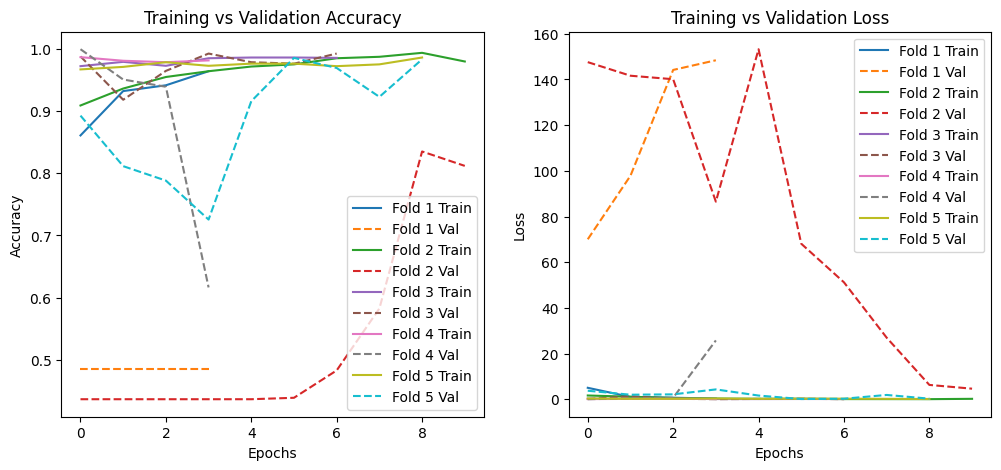

In [ ]:
# 📌 Step 8: Plot Accuracy & Loss Graphs for Each Fold

def plot_training_history(fold_histories):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for i, history in enumerate(fold_histories):
        plt.plot(history['accuracy'], label=f'Fold {i+1} Train')
        plt.plot(history['val_accuracy'], linestyle='dashed', label=f'Fold {i+1} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for i, history in enumerate(fold_histories):
        plt.plot(history['loss'], label=f'Fold {i+1} Train')
        plt.plot(history['val_loss'], linestyle='dashed', label=f'Fold {i+1} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot graphs
plot_training_history(fold_histories)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Step 1: Load the best model saved (you can also load models for other folds if needed)
model = load_model('best_model_fold5.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(fold_histories):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for i, history in enumerate(fold_histories):
        plt.plot(history['accuracy'], label=f'Fold {i+1} Train')
        plt.plot(history['val_accuracy'], linestyle='dashed', label=f'Fold {i+1} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for i, history in enumerate(fold_histories):
        plt.plot(history['loss'], label=f'Fold {i+1} Train')
        plt.plot(history['val_loss'], linestyle='dashed', label=f'Fold {i+1} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()


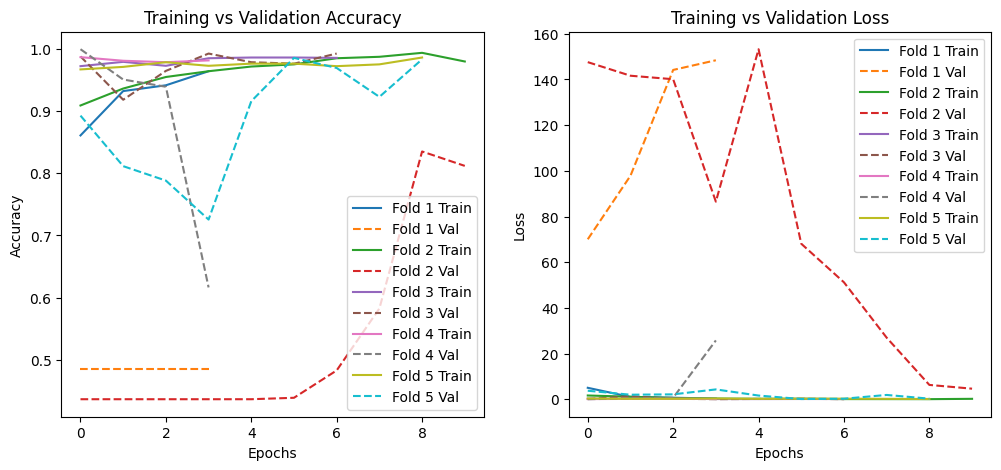

In [ ]:
# Assuming you already have fold_histories with data from K-Fold cross-validation
plot_training_history(fold_histories)


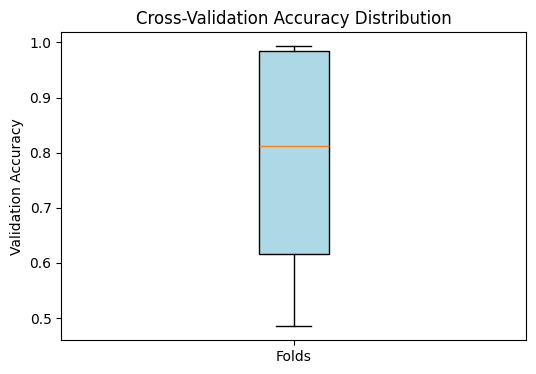

In [ ]:
# Extracting the final validation accuracy from each fold's history
avg_accuracy = [history['val_accuracy'][-1] for history in fold_histories]

# Plotting the boxplot for validation accuracy across folds
plt.figure(figsize=(6, 4))
plt.boxplot(avg_accuracy, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Cross-Validation Accuracy Distribution")
plt.ylabel("Validation Accuracy")
plt.xticks([1], ['Folds'])
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the uploaded image
img_path = '/content/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG'  # Make sure this path is correct
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale image as done during training

# Predict the class using the trained model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Map class index to class name
class_names = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
predicted_class_name = class_names[predicted_class[0]]

print(f"Predicted Class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
Predicted Class: Potato___Early_blight
